### Importing Required Liberaries

Let's import the required libraries first. As names of libraries are self-descriptive so I am sure you will understand them. 

In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

When you load an image using OpenCV it loads that image into BGR color space by default. To show the colored image using `matplotlib` we have to convert it to RGB space. Following is a helper function to do exactly that. 

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**`cv2.cvtColor`** is an OpenCV function to convert images to different color spaces. It takes an image to convert and a color space code (like cv2.COLOR_BGR2RGB) to convert image to and returns the converted image. 

Now that we are all setup, let's start coding our first face detector `Haar`. 

### Code - Haar Cascade Classifier

First let's start with a simple task, **load our input image, convert it to grayscale mode and then display it**. Remember the `cv2.cvtColor` function I just mentioned above? Yeah, exactly that one! You should keep it in mind as it is a very handy function. We are going to use it to convert our image to gray scale.

Now you must be wondering, why do we have to convert our image to gray scale? Well, many operations in OpenCV **are done in grayscale** for performance reasons. 

Let's first read/load our image and convert it to gray scale. For reading image, I have used OpenCV's function built in function **`cv2.imread(img_path)`** by passing our image path as an input parameter. 

In [3]:
#load test iamge
test1 = cv2.imread('.\Face Recog\Image_FACE_REC.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

In [117]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [128]:
video = cv2.VideoCapture('Intrusion_Detection_video.mp4')

Now let's display our loaded image. To display our image, I am going to use **plt.imshow(img, cmap)** function of `matplotlib`. 

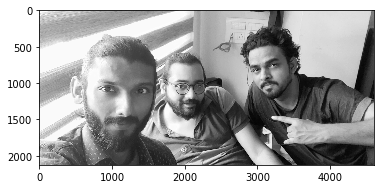

In [4]:
#if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')

# or display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

It looks beautiful, does'nt it? Now let's detect face but before we can do face detection we have to load our Haar cascade classifier. OpenCV provides us with a class **[`cv2.CascadeClassifier`](http://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cascadeclassifier)** which takes input the training file of the classifier (Haar/LBP) we want to load and loads it for us. It's that easy! 

As we want to load our favorite Haar classifier so XML training files for Haar cascade are stored in `opencv/data/haarcascades/` folder. You can also find them in data folder of Github repo I have shared with you at the end of this article. 

Let's load up our classifier. 

In [5]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

Now how do we detect face from image using our `CascadeClassifier` we just loaded? Well OpenCV's CascadedClassifier has made it simple for us as it comes with a simple function **`detectMultiScale`**. This function detects the faces in a given test image and following are details of its options/arugments.

* **`detectMultiScale(image, scaleFactor, minNeighbors)`:** A general function that detects objects. Since we are calling it on the face cascade, that’s what it detects. If faces are found, this function returns a list of positions of detected faces as Rect(x,y,w,h). If no faces are detected then it returns `None`.

* **`image`:** The first option is the **gray scale image**. Again, the image should be **_gray scale_**.

* **`scaleFactor`:** Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The scale factor compensates for this.

* **`minNeighbors`:** The detection algorithm uses a moving window to detect objects. This parameter defines how many objects are detected near the current one before it declares the face found.  

There are other parameters as well and you can review the full details of this function [here](http://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale). These parameters need to be tuned according to your data. 

Now that we know a simple and easy way to detect faces, we can find the face in our test image. Then let's detect one. The following code will try to detect face from image and if detected it will print the number of faces found in the image, which in our case should be 1. 

In [6]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(test1, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  3


Ohooo! We detected our face.

Next, let's loop over the list of faces (rectangles) it returned and draw those rectangles using built in OpenCV **`rectangle`** function on our original colored image to see if it detected the right faces. 

In [8]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 15)

Display the original image to see rectangles drawn and verify that detected faces are really faces and not false positives. 

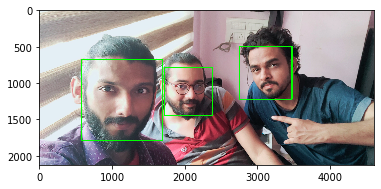

In [9]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))